<h1><center> TP2: Pandas, data analysis library </center></h1>

The deadline for report submission is Tuesday, December 8th 2020.

Note: the goal of this TP is to become familiar with 'pandas' class in Python. This library is often used for data analysis and is convenient for manipulation tool.
We consider a case study based on a dataset that contains information about bookings of two hotels. Hotel 1 is a resort hotel and Hotel 2 is a city hotel in Portugal. The dataset was released by https://www.sciencedirect.com/science/article/pii/S2352340918315191.

We first list the basic function in pandas. PART 1 aims at using pandas as a visualization tools to a better understanding of data. PART 2 shows how easy it is to combine "pandas" dataframes and "sklearn" models to build additional features and predict. 

As a homework, we propose you a very concret problem which is open and for which we are waiting for your creativity (as usual)!

In [2]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib notebook

# Short intro into pandas

In [3]:
data = pd.read_csv("data/bookings.csv") 

In [3]:
data.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [4]:
data.head(5) # print first 5 entries of the dataset

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [5]:
data.columns # print column names

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

This dataset contains information about bookings of two hotels. Hotel 1 is a resort hotel and Hotel 2 is a city hotel in Portugal. The dataset was released by https://www.sciencedirect.com/science/article/pii/S2352340918315191.

There are 32 columns in this dataset:

1. **hotel** -- one of the two hotels
2. **is_canceled** -- Value indicating if the booking was canceled (1) or not (0)
3. **lead_time** -- Number of days that elapsed between the entering date of the booking into the PMS and the arrival date
4. ....

For the full description of each column please see: https://www.kaggle.com/jessemostipak/hotel-booking-demand

In [6]:
data['country'] # we can also print each column of the dataset

0         PRT
1         PRT
2         GBR
3         GBR
4         GBR
         ... 
119385    BEL
119386    FRA
119387    DEU
119388    GBR
119389    DEU
Name: country, Length: 119390, dtype: object

In [6]:
data['country'].unique() # list all unique values in the column

array(['PRT', 'GBR', 'USA', 'ESP', 'IRL', 'FRA', nan, 'ROU', 'NOR', 'OMN',
       'ARG', 'POL', 'DEU', 'BEL', 'CHE', 'CN', 'GRC', 'ITA', 'NLD',
       'DNK', 'RUS', 'SWE', 'AUS', 'EST', 'CZE', 'BRA', 'FIN', 'MOZ',
       'BWA', 'LUX', 'SVN', 'ALB', 'IND', 'CHN', 'MEX', 'MAR', 'UKR',
       'SMR', 'LVA', 'PRI', 'SRB', 'CHL', 'AUT', 'BLR', 'LTU', 'TUR',
       'ZAF', 'AGO', 'ISR', 'CYM', 'ZMB', 'CPV', 'ZWE', 'DZA', 'KOR',
       'CRI', 'HUN', 'ARE', 'TUN', 'JAM', 'HRV', 'HKG', 'IRN', 'GEO',
       'AND', 'GIB', 'URY', 'JEY', 'CAF', 'CYP', 'COL', 'GGY', 'KWT',
       'NGA', 'MDV', 'VEN', 'SVK', 'FJI', 'KAZ', 'PAK', 'IDN', 'LBN',
       'PHL', 'SEN', 'SYC', 'AZE', 'BHR', 'NZL', 'THA', 'DOM', 'MKD',
       'MYS', 'ARM', 'JPN', 'LKA', 'CUB', 'CMR', 'BIH', 'MUS', 'COM',
       'SUR', 'UGA', 'BGR', 'CIV', 'JOR', 'SYR', 'SGP', 'BDI', 'SAU',
       'VNM', 'PLW', 'QAT', 'EGY', 'PER', 'MLT', 'MWI', 'ECU', 'MDG',
       'ISL', 'UZB', 'NPL', 'BHS', 'MAC', 'TGO', 'TWN', 'DJI', 'STP',
       'KNA', 'E

In [7]:
data.count()

hotel                             119390
is_canceled                       119390
lead_time                         119390
arrival_date_year                 119390
arrival_date_month                119390
arrival_date_week_number          119390
arrival_date_day_of_month         119390
stays_in_weekend_nights           119390
stays_in_week_nights              119390
adults                            119390
children                          119386
babies                            119390
meal                              119390
country                           118902
market_segment                    119390
distribution_channel              119390
is_repeated_guest                 119390
previous_cancellations            119390
previous_bookings_not_canceled    119390
reserved_room_type                119390
assigned_room_type                119390
booking_changes                   119390
deposit_type                      119390
agent                             103050
company         

This dataset contains 119390 different reservations. Some of the reservations have missing values.


In [8]:
data.values # A data frame can be converted into a numpy array by calling the values attribute:

array([['Resort Hotel', 0, 342, ..., 0, 'Check-Out', '2015-07-01'],
       ['Resort Hotel', 0, 737, ..., 0, 'Check-Out', '2015-07-01'],
       ['Resort Hotel', 0, 7, ..., 0, 'Check-Out', '2015-07-02'],
       ...,
       ['City Hotel', 0, 34, ..., 4, 'Check-Out', '2017-09-07'],
       ['City Hotel', 0, 109, ..., 0, 'Check-Out', '2017-09-07'],
       ['City Hotel', 0, 205, ..., 2, 'Check-Out', '2017-09-07']],
      dtype=object)

However this array cannot be directly fed to a scikit-learn model.

1. the values are heterogeneous (strings for categories, integers, and floating point numbers)
2. some attribute values are missing

# Predicting cancellation: Part I -- visualization

**Our goals** The goal of this part is to provide few examples of visualization combining ```pandas```, ```matplotlib```, ```seaborn```. 

We will look at a very natural and practical task -- predicting cancellation of a given reservation. Of course, the first instinct of the modern 'ML practitioner' is to throw all the data to some neural net and perform bunch of fine-tuning. There are really a lot of problems with such an approach. As a general rule of thumbs: explore your data before building ML pipelines! It is alway more interesting to investigate the data and find human-interpretable patterns.

Pandas allows to manipulate the dataset in a very convenient manner. Those familiar with SQL will certainly appreciate it! 

As the first visualization task let us understand which monthes have the most amount of cancellations.
We start by creating a new dataset that contains the information that we would like to plot.

In [9]:

'''
 We create two datasets for each hotel .groupby("arrival_date_month") will group observations by the month
 and .count() function will simply count the amount of reservations for each month
'''
n_reserv_H1 = data.loc[(data["hotel"] == "Resort Hotel")].groupby("arrival_date_month")["hotel"].count()
n_cancel_H1 = data.loc[(data["hotel"] == "Resort Hotel")].groupby("arrival_date_month")["is_canceled"].sum()

# same thing we do for the second hotel
n_reserv_H2 = data.loc[(data["hotel"] == "City Hotel")].groupby("arrival_date_month")["hotel"].count()
n_cancel_H2 = data.loc[(data["hotel"] == "City Hotel")].groupby("arrival_date_month")["is_canceled"].sum()

In [10]:
n_reserv_H1.head() # again we can have a look at the top 5 entries

arrival_date_month
April       3609
August      4894
December    2648
February    3103
January     2193
Name: hotel, dtype: int64

In [11]:
n_cancel_H1.head()

arrival_date_month
April       1059
August      1637
December     631
February     795
January      325
Name: is_canceled, dtype: int64

In [12]:
n_reserv_H1['April'] # number of reservation for Resort Hotel for April

3609

In [13]:
n_cancel_H1['April'] # number of cancelled reservations for Resort Hotel

1059

In [14]:
# finally, we gather everything together


data_visualH1 = pd.DataFrame({"hotel": "Resort Hotel",
                                "month": list(n_reserv_H1.index),
                                "n_booking": list(n_reserv_H1.values),
                                "n_cancel": list(n_cancel_H1.values)})
data_visualH2 = pd.DataFrame({"hotel": "City Hotel",
                                "month": list(n_reserv_H2.index),
                                "n_booking": list(n_reserv_H2.values),
                                "n_cancel": list(n_cancel_H2.values)})
data_visual = pd.concat([data_visualH1, data_visualH2], ignore_index=True)

# notice how easy it is to add a new column. We simply write the following
data_visual["percent_cancel"] = data_visual["n_cancel"] / data_visual["n_booking"] * 100 # percent of cancelations

In [15]:
data_visual.head() # our final dataset

,hotel,month,n_booking,n_cancel,percent_cancel
0,Resort Hotel,April,3609,1059,29.343308
1,Resort Hotel,August,4894,1637,33.449121
2,Resort Hotel,December,2648,631,23.829305
3,Resort Hotel,February,3103,795,25.620367
4,Resort Hotel,January,2193,325,14.819881


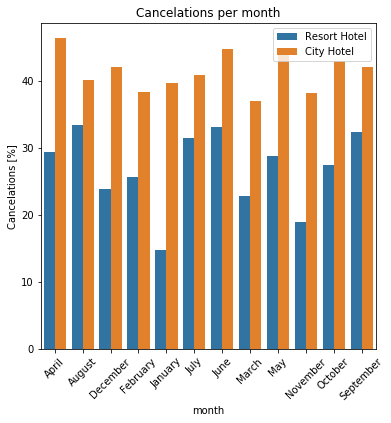

In [16]:
# plotting is simple once we have good dataset.
plt.figure(figsize=(6, 6))
sns.barplot(x = "month", y = "percent_cancel" , hue="hotel",
            hue_order = ["Resort Hotel", "City Hotel"], data=data_visual)
plt.title("Cancelations per month")
plt.xticks(rotation=45)
plt.ylabel("Cancelations [%]")
plt.legend()
plt.show()

Previous plot is nice, but the ordering of the month is very annoying!

**Question 1.** Propose a solution that will re-order the barplot above using standard month ordering. Hint: use ```pd.Categorical()``` function of pandas.

**Answer:** we have to consider the `month` variable as a categorical and ordered variable (as a factor). The following lines allow to do so. And then we just plot the new `month_categorical` variable using the previous code.

In [17]:
# create a vector of ordered months
months_ordered_from_july = data['arrival_date_month'].unique()
months_ordered_from_january = [months_ordered_from_july[i] for i in [*range(6, 12), *range(0, 6)]]
print(months_ordered_from_january)

#create a new 'month' variable which is categorical
data_visual["month_categorical"] = pd.Categorical(data_visual["month"], ordered=True,
                   categories=months_ordered_from_january)

['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']


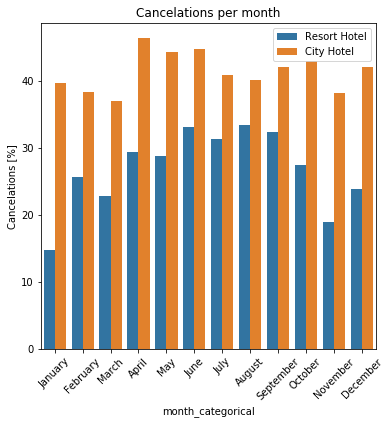

In [18]:
plt.figure(figsize=(6, 6))
sns.barplot(x = "month_categorical", y = "percent_cancel" , hue="hotel",
            hue_order = ["Resort Hotel", "City Hotel"], data=data_visual)
plt.title("Cancelations per month")
plt.xticks(rotation=45)
plt.ylabel("Cancelations [%]")
plt.legend()
plt.show()

**Question 2.** Provide interpretation of the above plot.

**Answer:** The cancelations at the City hotel are, in proportion, higher than in the Resort Hotel. For the Resort hotel, the cancelations are in proportion higher in summer and spring than in winter and fall. On the contrary, this seasonality is less observed for the City hotel, with pics in october, june and december.

**Question 3.** What is the most and the second most common country of origin for reservations of each hotel?

**Answer:** 

- **Resort Hotel** : the first most common country of origin for reservations is Portugal (PRT) and the second one is Great Britain (GBR)
- **City Hotel** : the first most common country of origin for reservations is Portugal (PRT) and the second one is France (FRA)

In [19]:
# Lets create a database following the same model than before but using countries instead of months
#First Hotel
n2_reserv_H1 = data.loc[(data["hotel"] == "Resort Hotel")].groupby("country")["hotel"].count()
data2_visualH1 = pd.DataFrame({"hotel": "Resort Hotel",
                                "country": list(n2_reserv_H1.index),
                                "n_booking": list(n2_reserv_H1.values)})
data2_visualH1.sort_values(by=['n_booking'], ascending=False)

,hotel,country,n_booking
95,Resort Hotel,PRT,17630
45,Resort Hotel,GBR,6814
40,Resort Hotel,ESP,3957
55,Resort Hotel,IRL,2166
44,Resort Hotel,FRA,1611
...,...,...,...
77,Resort Hotel,MKD,1
92,Resort Hotel,PLW,1
90,Resort Hotel,PER,1
80,Resort Hotel,MUS,1


In [20]:
#Second Hotel
n2_reserv_H2 = data.loc[(data["hotel"] == "City Hotel")].groupby("country")["hotel"].count()
data2_visualH2 = pd.DataFrame({"hotel": "City Hotel",
                                "country": list(n2_reserv_H2.index),
                                "n_booking": list(n2_reserv_H2.values)})
data2_visualH2.sort_values(by=['n_booking'], ascending=False)

,hotel,country,n_booking
125,City Hotel,PRT,30960
50,City Hotel,FRA,8804
39,City Hotel,DEU,6084
53,City Hotel,GBR,5315
46,City Hotel,ESP,4611
...,...,...,...
107,City Hotel,MRT,1
133,City Hotel,SDN,1
111,City Hotel,NAM,1
112,City Hotel,NCL,1


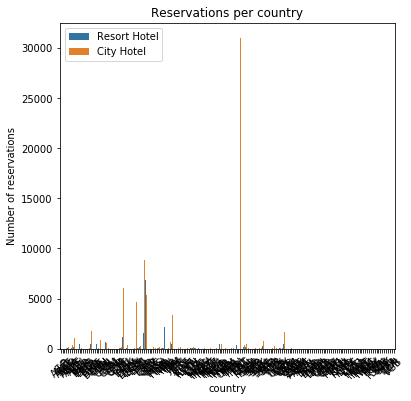

In [21]:
# The plot is unreadable (to many contries)
data2_visual = pd.concat([data2_visualH1, data2_visualH2], ignore_index=True)

plt.figure(figsize=(6, 6))
sns.barplot(x = "country", y = "n_booking" , hue="hotel",
            hue_order = ["Resort Hotel", "City Hotel"], data=data2_visual)
plt.title("Reservations per country")
plt.xticks(rotation=45)
plt.ylabel("Number of reservations")
plt.legend()
plt.show()

## Commentaire Kim : essayer pour avoir des points bonus de faire
# un graphique lisible (orientation horizontale ? )

**Question 4.** Plot the number of cancelations for repeated and not repeated guests for both hotels.

**Answer** : See the 2 plots below the teacher's proposition

[]

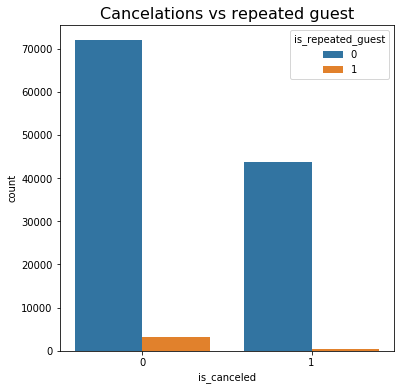

In [22]:
# For both hotels at the same time (teacher's proposition)
plt.figure(figsize=(6, 6))
sns.countplot(x="is_canceled", hue='is_repeated_guest', data=data)
plt.title("Cancelations vs repeated guest", fontsize=16)
plt.plot()

Most guests in these two hotels are not repeated, while the repreated guests are less likely to cancel.

[]

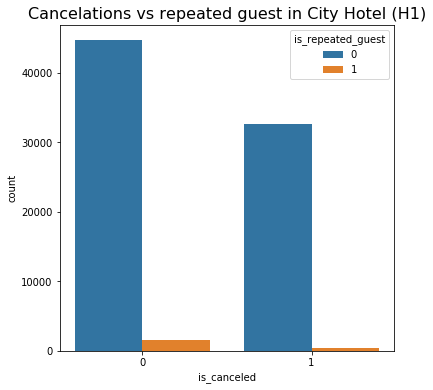

In [67]:
# The same only with City Hotel (H1)
plt.figure(figsize=(6, 6))
sns.countplot(x="is_canceled", hue='is_repeated_guest', data=data[(data['hotel'] == 'City Hotel')])
plt.title("Cancelations vs repeated guest in City Hotel (H1)", fontsize=16)
plt.plot()

[]

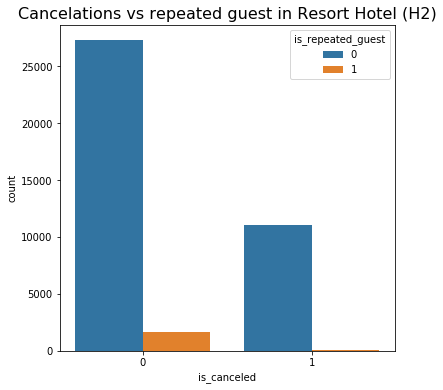

In [69]:
# The same only with Resort Hotel (H2)
plt.figure(figsize=(6, 6))
sns.countplot(x="is_canceled", hue='is_repeated_guest', data=data[(data['hotel'] == 'Resort Hotel')])
plt.title("Cancelations vs repeated guest in Resort Hotel (H2)", fontsize=16)
plt.plot()

End of question 4.

Text(0, 0.5, 'Count')

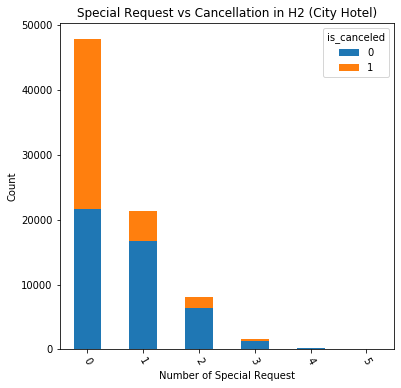

In [61]:
data_req = data[(data['hotel'] == 'City Hotel')].groupby(['total_of_special_requests', 'is_canceled']).size().unstack(level=1)
data_req.plot(kind='bar', stacked=True, figsize=(6,6))
plt.title('Special Request vs Cancellation in H2 (City Hotel)')
plt.xlabel('Number of Special Request', fontsize=10)
plt.xticks(rotation=300)
plt.ylabel('Count', fontsize=10)

Most of the reservations in the city hotel have no special requests and the cancelation in this case is almost 50/50. However, when special requests are made, the cancelation rate is significantly lower.


In [65]:
# From raw value to percentage
total = [i+j for i,j in zip(data_req[0], data_req[1])]
data_req['percent_0'] = [i / j * 100 for i,j in zip(data_req[0], total)]
data_req['percent_1'] = [i / j * 100 for i,j in zip(data_req[1], total)]
data_req.iloc[:, 2:4]
data_req

is_canceled,0,1,percent_0,percent_1
total_of_special_requests,,,,
0,21617,26340,45.075797,54.924203
1,16699,4721,77.959851,22.040149
2,6403,1739,78.641611,21.358389
3,1307,280,82.356648,17.643352
4,177,21,89.393939,10.606061
5,25,1,96.153846,3.846154


Text(0, 0.5, 'Count')

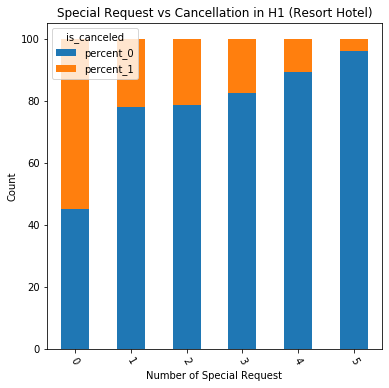

In [66]:
data_req.iloc[:, 2:4].plot(kind='bar', stacked=True, figsize=(6,6))
plt.title('Special Request vs Cancellation in H1 (Resort Hotel)')
plt.xlabel('Number of Special Request', fontsize=10)
plt.xticks(rotation=300)
plt.ylabel('Count', fontsize=10)


**Question 5.** Make the same plot for Resort Hotel. Make your conclusions.

**Answer**

Most of the reservations in the Resort Hotel have no special requests and the cancelation in this case is almost of 32 %. However, when special requests are made, the cancelation rate is lower (22 % when 1 special request is made, 23 % when 2 special requests are made, 18 % when 3 special request is made, 11 % when 4 special request is made, 7 % when 5 special request is made), but not as lower as with the City Hotel. 


Text(0, 0.5, 'Count')

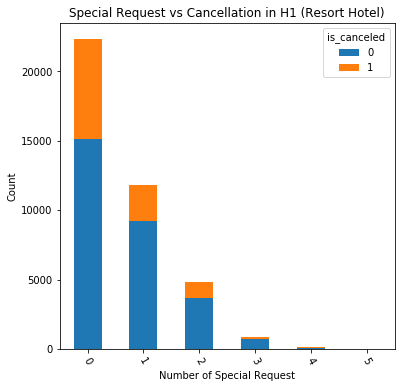

In [44]:
data_req2 = data[(data['hotel'] == 'Resort Hotel')].groupby(['total_of_special_requests',
                                                             'is_canceled']).size().unstack(level=1)
data_req.iloc[:, 2:4].plot(kind='bar', stacked=True, figsize=(6,6))
plt.title('Special Request vs Cancellation in H2 (City Hotel)')
plt.xlabel('Number of Special Request', fontsize=10)
plt.xticks(rotation=300)
plt.ylabel('Percentage', fontsize=10)

In [56]:
# From raw value to percentage
total = [i+j for i,j in zip(data_req2[0], data_req2[1])]
data_req2['percent_0'] = [i / j * 100 for i,j in zip(data_req2[0], total)]
data_req2['percent_1'] = [i / j * 100 for i,j in zip(data_req2[1], total)]
data_req2.iloc[:, 2:4]

is_canceled,percent_0,percent_1
total_of_special_requests,,
0,67.729529,32.270471
1,78.002710,21.997290
2,76.652165,23.347835
3,81.758242,18.241758
4,89.436620,10.563380
5,92.857143,7.142857


Text(0, 0.5, 'Percentage')

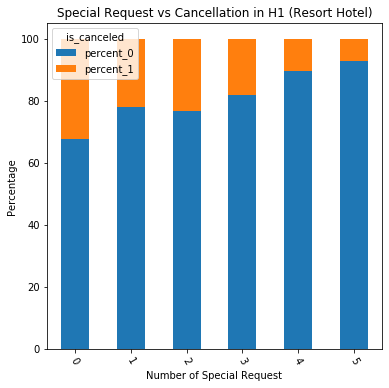

In [53]:
data_req2.iloc[:, 2:4].plot(kind='bar', stacked=True, figsize=(6,6))
plt.title('Special Request vs Cancellation in H1 (Resort Hotel)')
plt.xlabel('Number of Special Request', fontsize=10)
plt.xticks(rotation=300)
plt.ylabel('Percentage', fontsize=10)

# Predicting cancellations: Part II -- ML

**Our goals** The main message here is -- do not re-invent the wheel. The following few lines of code highlight the simplicity with which we can combine ```pandas``` dataframes and ```sklearn``` models. By learning few simple tools (i.e. ```pipeline```, ```gridsearchcv```) our code becomes readable, compact, and can be used to build extra features on top of it.

In [4]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [5]:
numeric_features = ["lead_time", "arrival_date_week_number", "total_of_special_requests"]
categorical_features = ["hotel", "market_segment","deposit_type","customer_type"]
features = numeric_features + categorical_features
X = data.drop(["is_canceled"], axis=1)[features]
y = data["is_canceled"]

Before using any ML algorithm from sklearn we need to handle missing values. There is no unique answer on how to deal with missing values in your dataset. We will use possibly the simplest approach. First of all if the feature is numerical and is misisng, we are going to replace it with zero. Secondly, if the feature is categorical and is missing, then we are going to define a new category and call it ```Not defined```.

In [6]:
numeric_transformer = SimpleImputer(strategy="constant", fill_value=0) # to deal with missing numeric data
categorical_transformer = Pipeline(steps=[
                                    ("imputer", SimpleImputer(strategy="constant", fill_value="Not defined")),
                                    ("onehot", OneHotEncoder(handle_unknown='ignore'))]) # to deal with missing categorical data 
preproc = ColumnTransformer(transformers=[("num", numeric_transformer, numeric_features),
                                          ("cat", categorical_transformer, categorical_features)])

**Question:** What is ```OneHotEncoder()```? Why do we use it in our case?

**Answer:**

One-Hot-Encoding is a way (among others such as label encoding) to convert categorical values into numerical values because most of the ML algorithms work better with numerical inputs.  In this strategy, each category value is converted into a new column and assigned a 1 or 0 (notation for true/false) value to the column. Let’s consider the previous example of the names of the hotels (first column) with one-hot encoding (2 last columns). See just below.

We use it in our case because **many variables are categorical** : hotel, arrival_date_month, customer_type, company, deposit_type, ...

*Source : see [here](https://towardsdatascience.com/categorical-encoding-using-label-encoding-and-one-hot-encoder-911ef77fb5bd).*

In [7]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder 
# creating instance of one-hot-encoder
enc = OneHotEncoder(handle_unknown='ignore')
# passing hotel-types-cat column (label encoded values of bridge_types)
enc_df = pd.DataFrame(enc.fit_transform(data[['hotel']]).toarray())
# merge with main dataframe on key values
hotel_df = data.iloc[:, 0:1].join(enc_df)
hotel_df.head()

,hotel,0,1
0,Resort Hotel,0.0,1.0
1,Resort Hotel,0.0,1.0
2,Resort Hotel,0.0,1.0
3,Resort Hotel,0.0,1.0
4,Resort Hotel,0.0,1.0


Now imagine a situation when you want to try a lot of different models and for each model you want to make some cross-validation to select the best hyperparameters. On top of that you want to preprocess the data so that you feed something meaningfull into each method.

The next chunk of code shows how to do it.

In [9]:
models = [("logreg", LogisticRegression(max_iter=500))]
grids = {"logreg" : {'logreg__C': np.logspace(-2, 2, 5, base=2)}}
for name, model in models:
    pipe = Pipeline(steps=[('preprocessor', preproc), (name, model)])
    clf = GridSearchCV(pipe, grids[name], cv=3)
    clf.fit(X, y)
    print('Results for {}'.format(name))
    print(clf.cv_results_)

C:\Users\isabe\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\isabe\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Results for logreg
{'mean_fit_time': array([4.07087485, 5.98240336, 5.58862392, 6.13180327, 6.71705214]), 'std_fit_time': array([1.22126722, 0.15632184, 0.62971467, 0.53611471, 0.32931622]), 'mean_score_time': array([0.13229084, 0.12428069, 0.11837212, 0.09969886, 0.12810993]), 'std_score_time': array([0.01828847, 0.0097287 , 0.00330041, 0.00781952, 0.00295324]), 'param_logreg__C': masked_array(data=[0.25, 0.5, 1.0, 2.0, 4.0],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'logreg__C': 0.25}, {'logreg__C': 0.5}, {'logreg__C': 1.0}, {'logreg__C': 2.0}, {'logreg__C': 4.0}], 'split0_test_score': array([0.70156042, 0.70123376, 0.70120863, 0.70196246, 0.70128402]), 'split1_test_score': array([0.78204387, 0.78149107, 0.78191824, 0.78242079, 0.78151619]), 'split2_test_score': array([0.73630516, 0.73841592, 0.73680772, 0.73522465, 0.73680772]), 'mean_test_score': array([0.73996982, 0.74038025, 0.7399782 , 0.7398693 , 0.73986

C:\Users\isabe\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**Question:** In the previous example we again encounter the convergence problem. Of course we can set higher number of iterations, but it is time consuming. As you have seen, proper normalization can resolve the issue. Insert a normalization step in the pipeline. Note that we do not want to normalize the categorical data, it simply does not make sense. Be careful to normalize only the numerical data. Did it resolve the warning?




**Answer :**
To normalize the numeric features of the data, we modify the `numeric_transformer`.
    
    #numeric_transformer = SimpleImputer(strategy="constant", fill_value=0) # to deal with missing numeric data
    
We change it into the following pipeline : 

    from sklearn.preprocessing import StandardScaler
    numeric_transformer = Pipeline(steps=[
                                        ("imputer", SimpleImputer(strategy="constant", fill_value=0)),
                                        ("scaler", StandardScaler())]) #NEW : rescale the data !

And it solved the warning!


In [12]:
from sklearn.preprocessing import StandardScaler
#numeric_transformer = SimpleImputer(strategy="constant", fill_value=0) # to deal with missing numeric data
numeric_transformer = Pipeline(steps=[
                                    ("imputer", SimpleImputer(strategy="constant", fill_value=0)),
                                    ("scaler", StandardScaler())]) #NEW : rescale the data !
preproc = ColumnTransformer(transformers=[("num", numeric_transformer, numeric_features),
                                          ("cat", categorical_transformer, categorical_features)])

In [13]:
models = [("logreg", LogisticRegression(max_iter=500))]
grids = {"logreg" : {'logreg__C': np.logspace(-2, 2, 5, base=2)}}
for name, model in models:
    pipe = Pipeline(steps=[('preprocessor', preproc), (name, model)])
    clf = GridSearchCV(pipe, grids[name], cv=3)
    clf.fit(X, y)
    print('Results for {}'.format(name))
    print(clf.cv_results_)

Results for logreg
{'mean_fit_time': array([2.55837496, 2.69537322, 2.88611603, 1.86789171, 2.02035022]), 'std_fit_time': array([0.52094459, 0.72350944, 0.80383829, 0.22110134, 0.2407612 ]), 'mean_score_time': array([0.14228789, 0.14925655, 0.14003483, 0.11128235, 0.12549829]), 'std_score_time': array([0.00849074, 0.0085241 , 0.01707868, 0.02100821, 0.01747902]), 'param_logreg__C': masked_array(data=[0.25, 0.5, 1.0, 2.0, 4.0],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'logreg__C': 0.25}, {'logreg__C': 0.5}, {'logreg__C': 1.0}, {'logreg__C': 2.0}, {'logreg__C': 4.0}], 'split0_test_score': array([0.70128402, 0.7000779 , 0.68552906, 0.67786517, 0.66600498]), 'split1_test_score': array([0.78262181, 0.78244591, 0.78232028, 0.78221977, 0.78219464]), 'split2_test_score': array([0.73585285, 0.73582772, 0.73582772, 0.736079  , 0.736079  ]), 'mean_test_score': array([0.73991956, 0.73945051, 0.73455902, 0.73205464, 0.72809


**Question:** As we can see, previous code uses only logistic regression. Modify the above code inserting your favorite ML method.


**Answer** : 

Below, you can see the same actions but using the **SVM** method instead of logistic regressions. The main differences are: 

- This time we use the following scaler : `MaxAbsScaler()`
- We use `LinearSVC()` instead of `LogisticRegression()`
- We test the parameter `svc__C` instead of `logreg__C`

=> The results of SVM seem to be a bit better than the ones for the logistic regression : the mean test scores are globally higher. 

<mark> @Isabelle Merci pour le débuggage ! Bonne idée le dataframe, je t'ai proposé de ne garder que quelques colonnes pour pouvoir inclure le tableau dans le rapport final (sinon trop large). 
Pour le fait de mettre les deux modèles dans la boucle : oui tu as raison c'est ce qu'il attendait à mon avis ! Et je n'ai conservé que ce dernier code du coup !</mark>
    
<mark>Pour ce qui est du choix entre MinMaxScaler et StandardScaler j'ai lu : "If the distribution of the quantity is normal, then it should be standardized, otherwise, the data should be normalized. Evaluate models on data prepared with each transform and use the transform or combination of transforms that result in the best performance for your data set on your model." => Donc je ne sais pas dans quel cas on est et pour choisir la meilleure façon est de comparer la perf entre les deux. Peut-être l'as-tu fait pour vouloir choisir MinMax ?
</mark>

In [8]:
from sklearn.svm import LinearSVC
from sklearn.preprocessing import MinMaxScaler
numeric_transformer = Pipeline(steps=[
                                    ("imputer", SimpleImputer(strategy="constant", fill_value=0)),
                                    ("scaler", MinMaxScaler())]) #NEW : MinMaxScaler
preproc = ColumnTransformer(transformers=[("num", numeric_transformer, numeric_features),
                                          ("cat", categorical_transformer, categorical_features)])
models = [("logreg", LogisticRegression(max_iter=500)),
          ("svc", LinearSVC(max_iter=700))]
grids = {"logreg" : {'logreg__C': np.logspace(-2, 2, 5, base=2)},
         "svc" : {'svc__C': np.logspace(-2, 2, 5, base=2)}}
for name, model in models:
    pipe = Pipeline(steps=[('preprocessor', preproc), (name, model)])
    clf = GridSearchCV(pipe, grids[name], cv=3)
    clf.fit(X, y)
    print('Results for {}'.format(name))
    #print(clf.cv_results_)
    display(pd.DataFrame(clf.cv_results_)[['params','mean_test_score', 'std_test_score',
                                           'rank_test_score']])

Results for logreg


,params,mean_test_score,std_test_score,rank_test_score
0,{'logreg__C': 0.25},0.739911,0.033078,1
1,{'logreg__C': 0.5},0.739308,0.033697,2
2,{'logreg__C': 1.0},0.734727,0.039153,3
3,{'logreg__C': 2.0},0.731234,0.043418,4
4,{'logreg__C': 4.0},0.727992,0.047488,5


Results for svc


,params,mean_test_score,std_test_score,rank_test_score
0,{'svc__C': 0.25},0.740933,0.036266,1
1,{'svc__C': 0.5},0.738647,0.039248,2
2,{'svc__C': 1.0},0.737424,0.040830,3
3,{'svc__C': 2.0},0.735489,0.043405,4
4,{'svc__C': 4.0},0.734057,0.045323,5


**Remark:** Note that in this part we picked only a small subset of features. We could have used other features as well.


# The homework

**The story!**
You are a data scientist working for the hotel, one day the manager comes and tells you.

In our hotels we have an option to offer a parking spot, which costs money. Apparently, not every customer is aware that we have such an option. I really want to offer parking spots for everyone who needs it, because the hotel can earn more money like that. Look, I can send an SMS notification to our customers. Of course SMS are not free, and, moreover, people get very much angry if they receive stupid notifications for no reason. For each new reservation, I would like to decide if I should or shouldn't send the notification to the customer.

**Problem** Explore your data to help the manager and construct a prediction algorithm, using the above template as an inspiration. 

**Warning!** Be aware, that some columns are not actually avaiable at the moment of reservation. For instance, the target column ```is_canceled``` from the previous part clearly cannot be observed at the moment when we need to decide to send the SMS.

In [18]:
#import packages for part III
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

### Choice of variables available 

We first **delete** from the dataset **4 features** that cannot be observed at the moment when the SMS is sent : 
`is_canceled`, `assigned_room_type`, `reservation_status` and `reservation_status_date`. See below for more details about these variables. 

-**hotel** : Hotel (H1 = Resort Hotel or H2 = City Hotel)
 
-<s>**is_canceled** : Value indicating if the booking was canceled (1) or not (0)</s>

-**lead_time** : Number of days that elapsed between the entering date of the booking into the PMS and the arrival date

-**arrival_date_year** : Year of arrival date

-**arrival_date_month** : Month of arrival date

-**arrival_date_week_number** : Week number of year for arrival date

-**arrival_date_day_of_month** : Day of arrival date

-**stays_in_weekend_nights** : Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel

-**stays_in_week_nights** : Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel

-**adults** : Number of adults

-**children** : Number of children

-**babies** : Number of babies

-**meal** : Type of meal booked. Categories are presented in standard hospitality meal packages: Undefined/SC – no meal package; BB – Bed & Breakfast; HB – Half board (breakfast and one other meal – usually dinner); FB – Full board (breakfast, lunch and dinner)

-**country** : Country of origin. Categories are represented in the ISO 3155–3:2013 format

-**market_segment** : Market segment designation. In categories, the term “TA” means “Travel Agents” and “TO” means “Tour Operators”

-**distribution_channel** : Booking distribution channel. The term “TA” means “Travel Agents” and “TO” means “Tour Operators”

-**is_repeated_guest** : Value indicating if the booking name was from a repeated guest (1) or not (0)

-**previous_cancellations** : Number of previous bookings that were cancelled by the customer prior to the current booking

-**previous_bookings_not_canceled** : Number of previous bookings not cancelled by the customer prior to the current booking

-**reserved_room_type** : Code of room type reserved. Code is presented instead of designation for anonymity reasons.

<s>-**assigned_room_type** : Code for the type of room assigned to the booking. Sometimes the assigned room type differs from the reserved room type due to hotel operation reasons (e.g. overbooking) or by customer request. Code is presented instead of designation for anonymity reasons.</s>

-**booking_changes** : Number of changes/amendments made to the booking from the moment the booking was entered on the PMS 

-**deposit_type** : Indication on if the customer made a deposit to guarantee the booking. This variable can assume three categories: No Deposit – no deposit was made; Non Refund – a deposit was made in the value of the total stay cost; Refundable – a deposit was made with a value under the total cost of stay.

-**agent** : ID of the travel agency that made the booking

-**company** : ID of the company/entity that made the booking or responsible for paying the booking. ID is presented instead of designation for anonymity reasons

-**days_in_waiting_list** : Number of days the booking was in the waiting list before it was confirmed to the customer

-**customer_type** : Type of booking, assuming one of four categories: Contract - when the booking has an allotment or other type of contract associated to it; Group – when the booking is associated to a group; Transient – when the booking is not part of a group or contract, and is not associated to other transient booking; Transient-party – when the booking is transient, but is associated to at least other transient booking

-**adr** : Average Daily Rate as defined by dividing the sum of all lodging transactions by the total number of staying nights

-**required_car_parking_spaces** : Number of car parking spaces required by the customer

-**total_of_special_requests** :  Number of special requests made by the customer (e.g. twin bed or high floor)

<s>-**reservation_status** : Reservation last status, assuming one of three categories: Canceled – booking was canceled by the customer; Check-Out – customer has checked in but already departed; No-Show – customer did not check-in and did inform the hotel of the reason why</s>

<s>-**reservation_status_date** : Date at which the last status was set. This variable can be used in conjunction with the ReservationStatus</s>

In [22]:
data2 = data.copy()

# New variable : boolean of value 1 if required_car_parking_spaces > 0
data2["bool_parking"] = data2["required_car_parking_spaces"] > 0 
data2["bool_parking"] = data2["bool_parking"].astype(int)

#We select the remaining features
numeric_features = ["lead_time", "arrival_date_year",
                    "adr",
                    "arrival_date_week_number",
                    "arrival_date_day_of_month", "stays_in_weekend_nights", "stays_in_week_nights", 
                    "adults", "children",
                    "babies", "previous_cancellations", 
                    "days_in_waiting_list", "previous_bookings_not_canceled", "booking_changes", 
                    "total_of_special_requests"]
categorical_features = ["meal", "country", "market_segment", "distribution_channel",
                        "hotel", "reserved_room_type", "deposit_type",#"agent", "company" BUG AVEC CES VARS
                       "customer_type","is_repeated_guest","arrival_date_month"] #"bool_parking"                       
features = numeric_features + categorical_features

#Transformers
numeric_transformer = Pipeline(steps=[
                                    ("imputer", SimpleImputer(strategy="constant", fill_value=0)),
                                    ("scaler", MinMaxScaler())]) 
categorical_transformer = Pipeline(steps=[
                                    ("imputer", SimpleImputer(strategy="constant", fill_value="Not defined")),
                                    ("onehot", OneHotEncoder(handle_unknown='ignore'))]) #
preproc = ColumnTransformer(transformers=[("num", numeric_transformer, numeric_features),
                                          ("cat", categorical_transformer, categorical_features)])

#And we chance the type of some variables from numeric to categorical
data2["agent"] = data2["agent"].astype('object')
#data2["company"] = data2["company"].astype('object')
#data2["is_repeated_guest"] = data2["is_repeated_guest"].astype('object')

# And drop the 4 which are not available in advance
X = data2.drop(["is_canceled","assigned_room_type","reservation_status","reservation_status_date"],
              axis=1)[features]
y = data2["bool_parking"]

#Create a test and a training set

X, y = shuffle(X,y)
X_train, X_test, y_train, y_test = train_test_split(X, y)

X_preproc = preproc.fit_transform(X)
X_train_preproc, X_test_preproc, y_train_preproc, y_test_preproc = train_test_split(X_preproc, y_preproc)


In [17]:
X.dtypes

lead_time                           int64
arrival_date_year                   int64
adr                               float64
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
previous_cancellations              int64
days_in_waiting_list                int64
previous_bookings_not_canceled      int64
booking_changes                     int64
total_of_special_requests           int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
hotel                              object
reserved_room_type                 object
deposit_type                       object
customer_type                      object
is_repeated_guest                 

### Descriptive plot

Now, we do some plots to see what kind of variables seem to be important to predict the outcome `bool_parking`. 

These plots make us draw some first conclusions about the interestring predictors of the outcome : 

People more susceptible to use a parking are People : 

- coming in groups and transient travellers : guests who are predominantly on-the-move and seek short hotel-stays (`customer_type = Group` or `Transient`)
- going to the Resort Hotel (`hotel = Resort Hotel`) => It may mean that we should do 2 different predictive models, one for each hotel
- who book directly at the hotel (`market_segment = direct`)
- who book a certain kind of room (`reserved_room_type = H`) but for anonymity reasons we don't know what it represents
- coming in the summer (`arrival_date_week_number` around `25`)
- who don't book in advance (`lead_time` close to `0`)
- rich (`adr` is `high`)
- who have children (children is `high`)

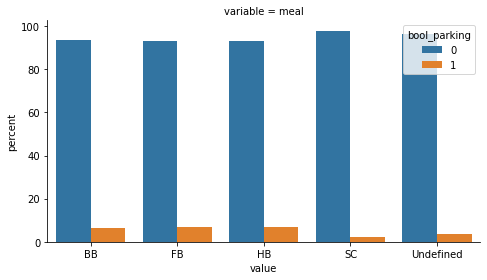

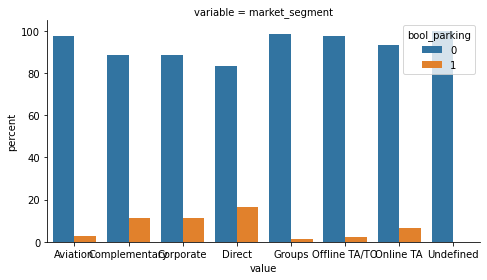

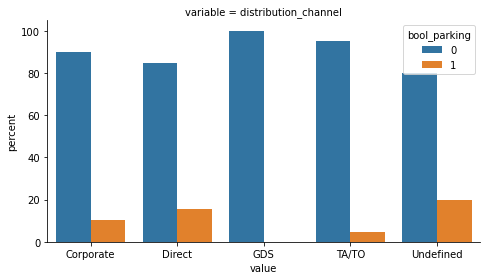

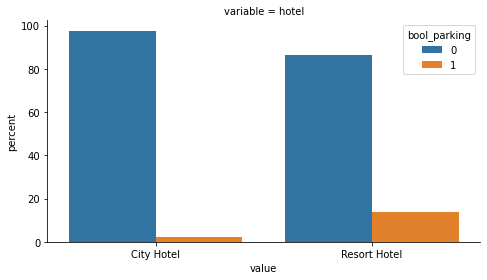

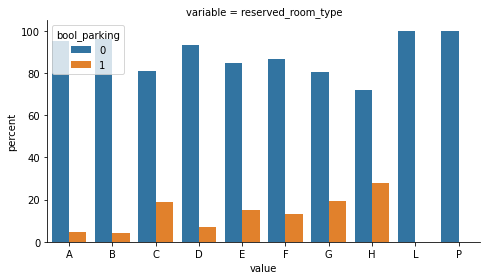

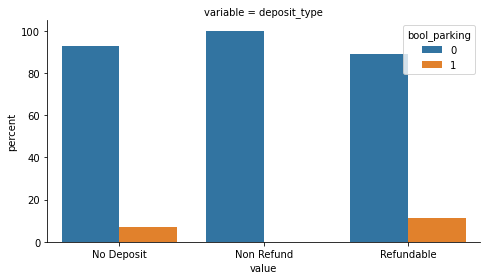

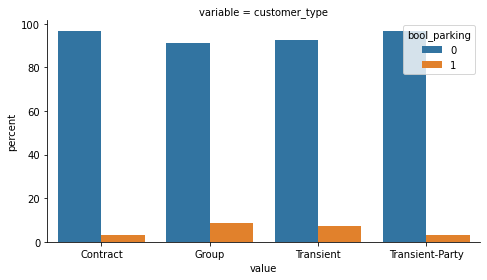

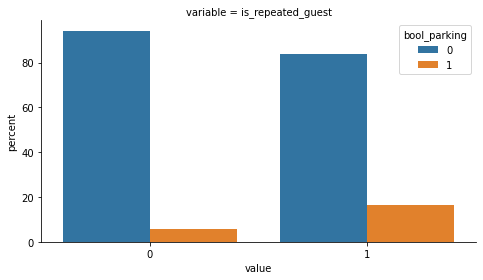

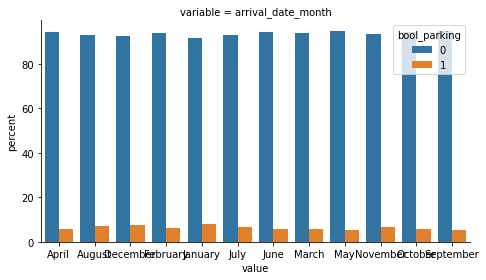

In [21]:
#------ Pour exécuter le code Javascript IPython dans JupyterLab -----------
%matplotlib inline
#--------------------------------------------------------
############# categorical variables
#variables = list(categorical_features[i] for i in [0,1,2,len(categorical_features)-1] ) #3,4,5,6,7,8,9
variables = categorical_features.copy()
variables.append("bool_parking")
#variables.pop(10) #variable company not very interesting to plot (to many of them)
#variables.pop(9) #variable agent not very intersting to plot (to many of them)
variables.pop(1) #variable country not very intersting to plot (to many of them)
df = data2.filter(variables)
df = pd.melt(df, df.columns[-1], df.columns[:-1])
#df.head()
# percentages
df = df.groupby(['variable','value'])['bool_parking'].value_counts(normalize=True)
df = df.mul(100)
df = df.rename('percent').reset_index()
#df.head()
#g = sns.catplot(x="value", y="percent", hue="bool_parking", col="variable", data=df,
#               col_wrap=3, kind="bar", sharex=False, sharey=True,legend_out=False) #height=2.5,aspect=.8, 
#g.add_legend()
for vExpl in list(variables):
    if vExpl != 'bool_parking':
        data_graph = df[(df['variable'] == vExpl)]
        g = sns.catplot(x="value", y="percent", hue="bool_parking", col="variable", data=data_graph,
               col_wrap=3, kind="bar", sharex=False, sharey=True,legend_out=False, height=4,aspect=1.6)

<IPython.core.display.Javascript object>


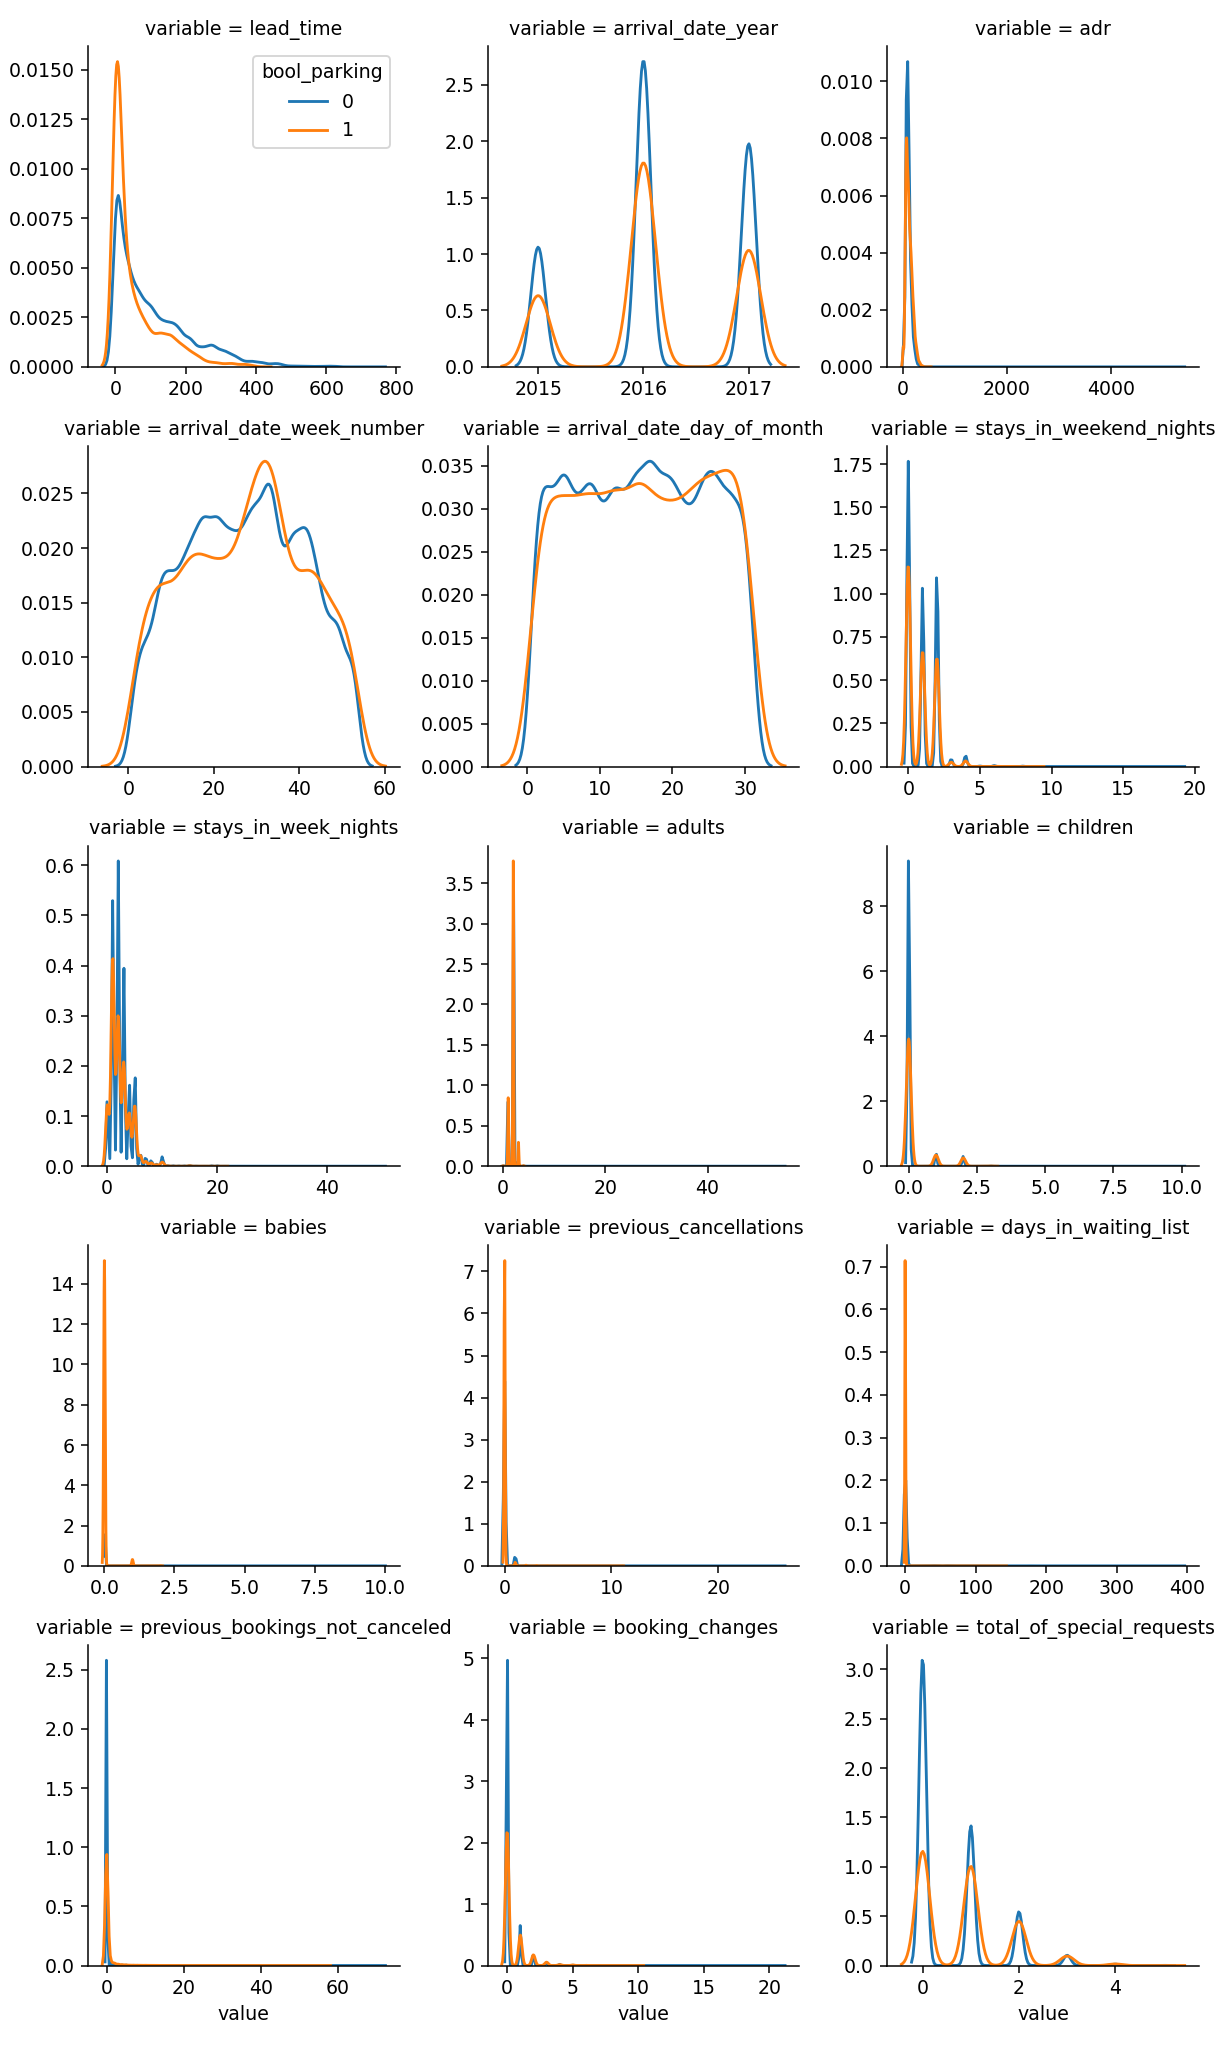

In [137]:
#--- Pour le problème de version en attendant de trouver une solution ----------
#sns.distributions._has_statsmodels = False
############# numeric variables
variables = numeric_features.copy()
variables.append("bool_parking")
df = data2.filter(variables)
df = pd.melt(df, df.columns[-1], df.columns[:-1])
g = sns.FacetGrid(df, col="variable", hue="bool_parking",
                  col_wrap=3,sharex=False, sharey=False,legend_out=False)
g.map(sns.kdeplot, "value") #, shade=True
#g.add_legend()

###  First model : simple logistic regression 


In [25]:
models = [("logreg", LogisticRegression(max_iter=700))]
grids = {"logreg" : {'logreg__C': np.logspace(-2, 2, 5, base=2)}}
for name, model in models:
    pipe = Pipeline(steps=[('preprocessor', preproc), (name, model)])
    clf = GridSearchCV(pipe, grids[name], cv=3)
    clf.fit(X_train, y_train)
    print('Results for {}'.format(name))
    #print(clf.cv_results_)
    print('Returned hyperparameter: {}'.format(clf.best_params_))
    print('Best classification accuracy in train is: {}'.format(clf.best_score_))
    print('Classification accuracy on test is: {}'.format(clf.score(X_test, y_test)))

Results for logreg
Returned hyperparameter: {'logreg__C': 0.5}
Best classification accuracy in train is: 0.9376940427539336
Classification accuracy on test is: 0.9384548378450818


In [27]:
#logregr = LogisticRegression(max_iter=500, C=0.25) #best parameter C=0.25
logregr = LogisticRegression(max_iter=500, C=0.5) #best parameter C=0.25
logregr.fit(X_train_preproc,y_train)
y_pred = logregr.predict(X_test_preproc)

from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
print("MSE: ", mean_squared_error(y_test, y_pred, squared=False))
print("R2: ", r2_score(y_test, y_pred))
print("accuracy : ", accuracy_score(y_test, y_pred)) #OK because for logistic regression Y_pred is binary

MSE:  0.2484877877253119
R2:  -0.06580967684342087
accuracy :  0.9382538193513803


###  Second model : regularized regression 

We try to improve the previous logistic regression using a polynomial regression with a regularization called LASSO. To only choose the features which best predict the outcome. Indeed, subsetting the feature may prevent from overfitting. LASSO regression is such as:

$$\hat f = \underset{f \in \mathcal F_n^\text{poly}}{argmin} \{ \frac{1}{2m} \sum_{i=1}^m (Y_i - f(X_i))^2 + \alpha \sum_{k=1}^n | a_k | \} $$

where $\alpha$ > 0 is a paremeter to choose.

In [28]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Lasso
from pprint import pprint# Look at parameters used by lasso
lasso = Lasso()
# print parameters available for lasso. The main is alpha
pprint(lasso.get_params())

{'alpha': 1.0,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': 1000,
 'normalize': False,
 'positive': False,
 'precompute': False,
 'random_state': None,
 'selection': 'cyclic',
 'tol': 0.0001,
 'warm_start': False}


Lasso path:

<mark> @Kim Penser plus tard à expliquer ce qu'est le lasso path</mark>

<Figure size 216x216 with 0 Axes>

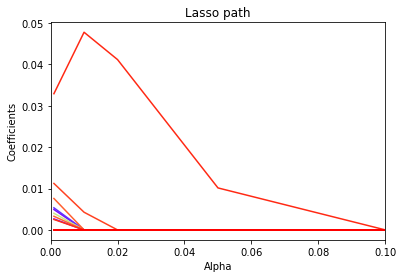

In [29]:
#lasso path 
from sklearn.linear_model import lasso_path
my_alphas = np.array([0.001,0.01,0.02,0.025,0.05,0.1,0.25,0.5,0.8,1.0])
alpha_for_path, coefs_lasso, _ = lasso_path(X_train_preproc,y,alphas=my_alphas)
nb_coeff = coefs_lasso.shape[0] #244
nb_alpha = coefs_lasso.shape[1]
import matplotlib.cm as cm
couleurs = cm.rainbow(np.linspace(0,1,nb_coeff))

#lasso path plot(one curve per variable)
plt.figure(figsize=(3, 3))
fig, ax1 = plt.subplots()
for i in range(nb_coeff):
    #plt.plot(alpha_for_path,coefs_lasso[i,:],c=couleurs[i])
    ax1.plot(alpha_for_path,coefs_lasso[i,:],c=couleurs[i])
plt.xlabel('Alpha')
plt.xlim(0,0.1)
plt.ylabel('Coefficients')
plt.title('Lasso path')
plt.show()

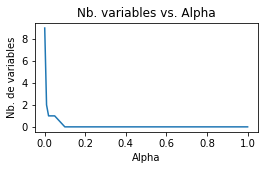

In [30]:
#number of non-zero coefficient(s) for each alpha
nbNonZero = np.apply_along_axis(func1d=np.count_nonzero,arr=coefs_lasso,axis=0)
plt.figure(figsize=(4, 2))
plt.plot(alpha_for_path,nbNonZero)
plt.xlabel('Alpha')
plt.ylabel('Nb. de variables')
plt.title('Nb. variables vs. Alpha')
plt.show()

<mark> fonction ci-dessous à debugger </mark>

In [31]:
#function to create labels for one-hot vectors
# inspiration : https://stackoverflow.com/questions/41987743/merge-two-multiindex-levels-into-one-in-pandas
def labels_one_hot(data, categorical, numeric):
    uniq_vals = data[categorical].apply(lambda x: x.value_counts()).unstack()
    uniq_vals = uniq_vals[~uniq_vals.isnull()]
    enc_cols = list(uniq_vals.index.map('{0[0]}_{0[1]}'.format)) 
    cols = numeric + enc_cols
    return(cols)
len(labels_one_hot(X,categorical_features,numeric_features))
#Problème dans cette fonction, il devrait y avoir 244 labels, il en manque 1 ! 
#Il doit y avoir un cas particulier traité bizarrement


243

In [22]:
nom_var = labels_one_hot(X,categorical_features,numeric_features) + ['toto'] #juste en raison du bug ci-dessus
#print the non-zero coefficients for alpha = 0.001
coeff001 = pd.DataFrame({'Variables':nom_var,'Coefficients':coefs_lasso[:,9]}) #alpha = 0.001
coeff001[coeff001['Coefficients']>0]

,Variables,Coefficients
3,arrival_date_week_number,0.001529
14,total_of_special_requests,0.040255
15,meal_BB,0.014124
71,country_ESP,0.047228
156,country_PRY,0.004632
200,market_segment_Direct,0.006604
201,market_segment_Groups,0.049918
206,distribution_channel_Direct,0.000074
207,distribution_channel_GDS,0.015934
212,reserved_room_type_A,0.096438


In [ ]:
#### cross-validation lasso : NOT WORKING VERY LONG ?!
models = [("lasso", Lasso(random_state=0, max_iter=10000))]
#my_alphas2 = [10**a for a in range(-6,1)]
grids = {"lasso" : {'lasso__alpha': my_alphas}}
for name, model in models:
    psi = PolynomialFeatures(4,include_bias=False).fit_transform #poly degres 4 par ex                   
    pipe = Pipeline(steps=[
                       (name, model)])
    clf = GridSearchCV(pipe, grids[name], cv=3)
    clf.fit(psi(X_train_preproc), y_train)
    print('Results for {}'.format(name))
    print('Returned hyperparameter: {}'.format(clf.best_params_))
    print('Best classification accuracy in train is: {}'.format(clf.best_score_))
    print('Classification accuracy on test is: {}'.format(clf.score(X_test, y_test)))
    print(clf.cv_results_)

<mark>Encore une fois la cross validation met des heures à tourner sans succès. Je ne comprends pas du coup j'ai essayé de faire ci-dessous sans cross-validation pour sauver la mise </mark>

<mark>    
Si besoin d'argumenter à ce sujet : 
Why using cross validation is not a good option for Lasso regression?
https://stats.stackexchange.com/questions/353185/why-using-cross-validation-is-not-a-good-option-for-lasso-regression
</mark>

In [ ]:
#Create a test and a training set

#Option 1  : celle que j'ai fait avant je crois que je m'étais trompée dans mon code
#poly=PolynomialFeatures()
#lasso.fit(X_train_preproc,y_train)

#Option 2 ?
psi = PolynomialFeatures(4,include_bias=False).fit_transform #poly degres4
lasso = Lasso(random_state=0, max_iter=100000, alpha=0.002)
lasso.fit(psi(X_train_preproc),y_train)

y_pred = lasso.predict(X_test_preproc)

from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
print("MSE: ", mean_squared_error(y_test, y_pred, squared=False))
print("R2: ", r2_score(y_test, y_pred))
#print("accuracy : ", accuracy_score(y_test, y_pred)) #impossible because not binary


<mark> long aussi même sans cross-validation après remplacement de l'option 1 (erreur) par l'option 2 :( </mark>


# Notes de Kim à supprimer plus tard

Je les garde encore un peu sous le coude

Ressources a exploiter par la suite 
http://eric.univ-lyon2.fr/~ricco/tanagra/fichiers/fr_Tanagra_Regression_Lasso_Python.pdf
https://scikit-learn.org/stable/auto_examples/linear_model/plot_lasso_coordinate_descent_path.html#sphx-glr-auto-examples-linear-model-plot-lasso-coordinate-descent-path-py

In [ ]:
#cross-validation spécifique au lasso : solution non retenue a priori. 
from sklearn.linear_model import LassoCV
lcv = LassoCV(alphas=my_alphas,normalize=False,fit_intercept=False,random_state=0,cv=5)#lancement sur l'échantillon d'apprentissagelcv.fit(ZTrain[:,:16],ZTrain[:,16]) 
#valeurs des alphas qui ont été testés
print(lcv.alphas)